In [120]:
import re

# Exercise #1
def is_allowed_specific_char(str: str) -> bool:
    # Uses re.compile function to compile a regular expression pattern.
    # Hypen (-) is used to specify a range of characters.
    # Brackets [] are used to define a character class. A character class allows you to specify a set of characters that you want to match at a particular position in the input string.
    charRe = re.compile(r'[^a-zA-Z0-9] ')
    valid = charRe.search(str)
    return not bool(valid)

is_allowed_specific_char('Hello World&')


# Exercise #2-3
def match_string_followed_by_zero(str: str) -> bool:
    # ^ - This is called the caret symbol and it represents the start of a line or string. In the context of the regular expression, it indicates that the pattern should match at the beginning of the line or string.

    # a - This is a literal character and it simply matches the letter 'a' exactly as it appears.

    # (b*) or `()` - Capturing group. The parentheses define a group, and the b* inside the parentheses is a sub-pattern. The b* means that it matches zero or more occurrences of the letter 'b'. The purpose of the capturing group is to capture the matched substring for later use.

    # $ - This is called the dollar sign and it represents the end of a line or string. In the context of the regular expression, it indicates that the pattern should match at the end of the line or string.
    

    # For zero or more `b's`
    charRe = re.compile(r'^a(b*)$')

    # For one or more `b's`
    # charRe = re.compile(r'^a(b+)$')

    # Zero or exactly one `b`
    # charRe = re.compile(r'^a(b?)$')

    # Zero or exactly two `b's`
    # charRe = re.compile(r'^a(b{2})$')

    # Sequences of lowercase letters joined by an underscore
    # '+' - This is a quantifier that matches one or more occurrences of the preceding pattern. In this regular expression, it is applied to [a-z], so it matches one or more lowercase letters.
    # '*' - This is a quantifier that matches zero or more occurrences of the preceding pattern. In this regular expression, it is applied to (_[a-z]+), so it matches zero or more sequences of an underscore followed by one or more lowercase letters.

    # charRe = re.compile(r'^[a-z]+(_[a-z]+)*$')

    charRe = re.compile(r'^[A-Z]+[a-z]+$')

    valid = charRe.search(str)
    return not bool(valid)
    


In [121]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

Source:

- https://nbviewer.org/github/swechhasingh/nlp-from-scratch/blob/main/bigram-LM.ipynb
- https://github.com/karpathy/makemore
- https://github.com/lionelmessi6410/Neural-Networks-from-Scratch
- https://nthu-datalab.github.io/ml/index.html

Designing a machine learning system is a multi-step process:

- Defining the problem
- Data collection and pre-processing
- Modelling and Training
- Evaluation of the model
- Deployment of the model


# Models


## Bi-gram count based model

**Goal**: Creating a machine learning system which can generate new _plausible_ English names for a person


In [122]:
names_df = None
with open('datasets/names.txt') as f:
    names_df = f.read().splitlines()    

print(names_df[:5])

['emma', 'olivia', 'ava', 'isabella', 'sophia']


In [123]:
# Exploring the dataset
# Size of the dataset
print('Number of names:', len(names_df))    

# Longest Name and Shortest Name
lengths = [len(name) for name in names_df]
print(f"Longest name: {names_df[lengths.index(max(lengths))]} ({max(lengths)})")

Number of names: 32033
Longest name: muhammadibrahim (15)


In [178]:
# Creating a character vocabulary
char_vocab = ['.'] + sorted(set(''.join(names_df)))
chartoi, itochar = {}, {}
for i, char in enumerate(char_vocab): 
    chartoi[char] = i
    itochar[i] = char

In [194]:
bigrams = dict()
total_bigrams = 0
for i, name in enumerate(names_df):
    # string to list of characters in the given string
    chars = ['.'] + list(name)+ ['.']
    # cool way to generate bigrams of a word in python
    for char1, char2 in zip(chars[:-1], chars[1:]):
        bigrams[(char1, char2)] = bigrams.get((char1, char2), 0) + 1
        total_bigrams += 1

    if i == 0:
        print(f"First word: {name}\n{chars=}\n{bigrams=}")

# Results
print(f"Number of unique characters: {len(char_vocab)}")
print(f"Number of unique bigrams: {len(bigrams)}")
print(f"Total number of bigrams: {total_bigrams}")

bigrams = dict(sorted(bigrams.items(), reverse=True, key=lambda x: x[1]))
print(bigrams.items())

# In Python, the asterisk (*) is used as the unpacking operator. When used in a function definition, it allows a function to accept a variable number of arguments.
# Creates a list first of the bigrams and then unpacks the bigram tuple to get the characters and the count
# Reverse sorts the bigrams by count, therefore the most common bigrams are at the beginning of the list
print(f"Most common bigrams: {[(*[ch for ch in x[0]], x[1]) for x in sorted(bigrams.items(), reverse=True, key=lambda x: x[1])][:5]}")

First word: emma
chars=['.', 'e', 'm', 'm', 'a', '.']
bigrams={('.', 'e'): 1, ('e', 'm'): 1, ('m', 'm'): 1, ('m', 'a'): 1, ('a', '.'): 1}
Number of unique characters: 27
Number of unique bigrams: 627
Total number of bigrams: 228146
dict_items([(('n', '.'), 6763), (('a', '.'), 6640), (('a', 'n'), 5438), (('.', 'a'), 4410), (('e', '.'), 3983), (('a', 'r'), 3264), (('e', 'l'), 3248), (('r', 'i'), 3033), (('n', 'a'), 2977), (('.', 'k'), 2963), (('l', 'e'), 2921), (('e', 'n'), 2675), (('l', 'a'), 2623), (('m', 'a'), 2590), (('.', 'm'), 2538), (('a', 'l'), 2528), (('i', '.'), 2489), (('l', 'i'), 2480), (('i', 'a'), 2445), (('.', 'j'), 2422), (('o', 'n'), 2411), (('h', '.'), 2409), (('r', 'a'), 2356), (('a', 'h'), 2332), (('h', 'a'), 2244), (('y', 'a'), 2143), (('i', 'n'), 2126), (('.', 's'), 2055), (('a', 'y'), 2050), (('y', '.'), 2007), (('e', 'r'), 1958), (('n', 'n'), 1906), (('y', 'n'), 1826), (('k', 'a'), 1731), (('n', 'i'), 1725), (('r', 'e'), 1697), (('.', 'd'), 1690), (('i', 'e'), 165

<class 'torch.Tensor'>


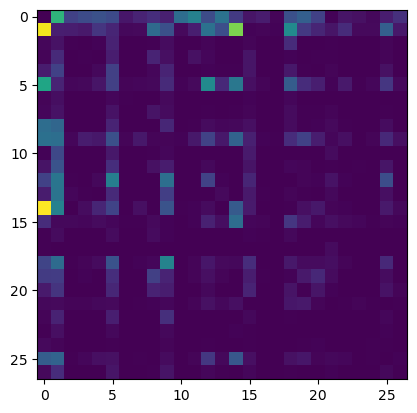

In [195]:
# Visualizing the bigrams
# 27 x 27 matrix
count_table = torch.zeros(len(char_vocab), len(char_vocab))
print(type(count_table))

for bigram, count in bigrams.items():  # Fix: iterate over items() of bigrams
    char1, char2 = bigram
    count_table[chartoi[char1], chartoi[char2]] = count

plt.imshow(count_table)